# <font color='red'>Classification using extracted features</font>
This notebook shows a classification using extracted features. With this it is possible to use typical supervised learning methods such as KNN or Logistic Regression for the classification problem.

## <font color='blue'>Note</font>: This Notebook contains the "all-in-one" classification! For a better and cleaner solution/overview use the modularized Notebooks instead.

<hr>
<center> <h1><font color="blue">Import modules</font></h1> </center>
<hr>

## Import general modules

In [1]:
#import neccessary modules
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics
import matplotlib.cm as cm
%matplotlib inline

## Import modules for feature extraction

In [2]:
# tsfresh modules (for feature extraction)
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters, MinimalFCParameters, EfficientFCParameters

import logging
# Set logger-level to "error". Not recommed: Important warnings can be overseen
logging.basicConfig(level=logging.ERROR)

## Import modules for the standard supervised learning algorithms

In [3]:
# import machine learning algorithms
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

<hr>
<center> <h1><font color="blue">Import and split the dataset</font></h1> </center>
<hr>
The current dataset can be load as a csv-file. The csv-file is presented as an dataframe object were each time series (punch) is identified with a unique punch_id (continual)

In [4]:
ds = pd.read_csv('../../Datasets/complete_smartpunch_dataset_AsOneDataFrame_periodMS2000_sampleUS1000.csv')
del ds['Unnamed: 0'] # remove the unnecessary column ... maybe this can be fixed in a later version of the dataset-exporter?! 

In [6]:
ds.head(2005)

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,6.793223,-2.383251,2.962314,0,1,0,0,0
1,6.689702,-2.651278,3.180722,1000,1,0,0,0
2,6.601798,-2.871387,3.359523,2000,1,0,0,0
3,6.528319,-3.047522,3.502029,3000,1,0,0,0
4,6.468075,-3.183627,3.611550,4000,1,0,0,0
5,6.419871,-3.283644,3.691398,5000,1,0,0,0
6,6.382516,-3.351516,3.744882,6000,1,0,0,0
7,6.354819,-3.391187,3.775314,7000,1,0,0,0
8,6.335585,-3.406601,3.786005,8000,1,0,0,0
9,6.323624,-3.401699,3.780265,9000,1,0,0,0


In [5]:
ds.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,6.793223,-2.383251,2.962314,0,1,0,0,0
1,6.689702,-2.651278,3.180722,1000,1,0,0,0
2,6.601798,-2.871387,3.359523,2000,1,0,0,0
3,6.528319,-3.047522,3.502029,3000,1,0,0,0
4,6.468075,-3.183627,3.611550,4000,1,0,0,0


In [6]:
test_ds= [
    {
        "_id": "5c8faaaae37533453c77fb20",
        "label": "Training",
        "hand": "L+R",
        "annotator": "Trainingsmode",
        "count": 81,
        "periodNS": 767000000,
        "raws": [
            {
                "_id": "5c8faaaae37533453c77facf",
                "timestamp": "0",
                "x": 9.68375301361084,
                "y": 0.9762716293334961,
                "z": 0.9834501147270203
            },
            {
                "_id": "5c8faaaae37533453c77fad0",
                "timestamp": "3000000",
                "x": 9.686145782470703,
                "y": 1.0456634759902954,
                "z": 1.0289137363433838
            },
            {
                "_id": "5c8faaaae37533453c77fad1",
                "timestamp": "1000000",
                "x": 9.645467758178711,
                "y": 1.1102696657180786,
                "z": 1.1341979503631592
            },
            {
                "_id": "5c8faaaae37533453c77fad2",
                "timestamp": "13000000",
                "x": 9.616754531860352,
                "y": 1.184447169303894,
                "z": 1.1676974296569824
            },
            {
                "_id": "5c8faaaae37533453c77fad3",
                "timestamp": "6000000",
                "x": 9.631111145019531,
                "y": 1.2394821643829346,
                "z": 1.1892328262329102
            },
            {
                "_id": "5c8faaaae37533453c77fad4",
                "timestamp": "9000000",
                "x": 9.698110580444336,
                "y": 1.4021940231323242,
                "z": 1.3399807214736938
            },
            {
                "_id": "5c8faaaae37533453c77fad5",
                "timestamp": "11000000",
                "x": 9.67657470703125,
                "y": 1.3854442834854126,
                "z": 1.2299108505249023
            },
            {
                "_id": "5c8faaaae37533453c77fad6",
                "timestamp": "13000000",
                "x": 9.69093132019043,
                "y": 1.4524433612823486,
                "z": 1.1102696657180786
            },
            {
                "_id": "5c8faaaae37533453c77fad7",
                "timestamp": "6000000",
                "x": 9.681360244750977,
                "y": 1.3591232299804688,
                "z": 0.8997012972831726
            },
            {
                "_id": "5c8faaaae37533453c77fad8",
                "timestamp": "13000000",
                "x": 9.69093132019043,
                "y": 1.5409778356552124,
                "z": 0.8542376756668091
            },
            {
                "_id": "5c8faaaae37533453c77fad9",
                "timestamp": "6000000",
                "x": 9.678967475891113,
                "y": 1.6390835046768188,
                "z": 0.8039883971214294
            },
            {
                "_id": "5c8faaaae37533453c77fada",
                "timestamp": "13000000",
                "x": 9.650253295898438,
                "y": 1.5864413976669312,
                "z": 0.763310432434082
            },
            {
                "_id": "5c8faaaae37533453c77fadb",
                "timestamp": "13000000",
                "x": 9.640682220458984,
                "y": 1.648654818534851,
                "z": 0.8111668825149536
            },
            {
                "_id": "5c8faaaae37533453c77fadc",
                "timestamp": "5000000",
                "x": 9.616754531860352,
                "y": 1.674975872039795,
                "z": 0.8327022790908813
            },
            {
                "_id": "5c8faaaae37533453c77fadd",
                "timestamp": "12000000",
                "x": 9.609575271606445,
                "y": 1.7228323221206665,
                "z": 0.8590233325958252
            },
            {
                "_id": "5c8faaaae37533453c77fade",
                "timestamp": "7000000",
                "x": 9.542576789855957,
                "y": 1.7276179790496826,
                "z": 0.8398807644844055
            },
            {
                "_id": "5c8faaaae37533453c77fadf",
                "timestamp": "12000000",
                "x": 9.54496955871582,
                "y": 1.7850457429885864,
                "z": 0.8374879360198975
            },
            {
                "_id": "5c8faaaae37533453c77fae0",
                "timestamp": "7000000",
                "x": 9.516255378723145,
                "y": 1.8376877307891846,
                "z": 0.8422735929489136
            },
            {
                "_id": "5c8faaaae37533453c77fae1",
                "timestamp": "12000000",
                "x": 9.53061294555664,
                "y": 1.8616160154342651,
                "z": 0.8398807644844055
            },
            {
                "_id": "5c8faaaae37533453c77fae2",
                "timestamp": "12000000",
                "x": 9.559326171875,
                "y": 1.9142581224441528,
                "z": 0.7824530005455017
            },
            {
                "_id": "5c8faaaae37533453c77fae3",
                "timestamp": "6000000",
                "x": 9.509077072143555,
                "y": 1.9357935190200806,
                "z": 0.7537391185760498
            },
            {
                "_id": "5c8faaaae37533453c77fae4",
                "timestamp": "11000000",
                "x": 9.528220176696777,
                "y": 1.947757601737976,
                "z": 0.7728816866874695
            },
            {
                "_id": "5c8faaaae37533453c77fae5",
                "timestamp": "8000000",
                "x": 9.54496955871582,
                "y": 1.9453648328781128,
                "z": 0.8039883971214294
            },
            {
                "_id": "5c8faaaae37533453c77fae6",
                "timestamp": "14000000",
                "x": 9.547362327575684,
                "y": 1.9310078620910645,
                "z": 0.8135597109794617
            },
            {
                "_id": "5c8faaaae37533453c77fae7",
                "timestamp": "10000000",
                "x": 9.528220176696777,
                "y": 1.9525432586669922,
                "z": 0.8327022790908813
            },
            {
                "_id": "5c8faaaae37533453c77fae8",
                "timestamp": "7000000",
                "x": 9.521040916442871,
                "y": 1.9381862878799438,
                "z": 0.8327022790908813
            },
            {
                "_id": "5c8faaaae37533453c77fae9",
                "timestamp": "12000000",
                "x": 9.504291534423828,
                "y": 1.8903298377990723,
                "z": 0.849452018737793
            },
            {
                "_id": "5c8faaaae37533453c77faea",
                "timestamp": "5000000",
                "x": 9.523433685302734,
                "y": 1.852044701576233,
                "z": 0.8781659007072449
            },
            {
                "_id": "5c8faaaae37533453c77faeb",
                "timestamp": "11000000",
                "x": 9.521040916442871,
                "y": 1.8233308792114258,
                "z": 0.9260223507881165
            },
            {
                "_id": "5c8faaaae37533453c77faec",
                "timestamp": "9000000",
                "x": 9.549755096435547,
                "y": 1.794616937637329,
                "z": 0.9930213689804077
            },
            {
                "_id": "5c8faaaae37533453c77faed",
                "timestamp": "12000000",
                "x": 9.53779125213623,
                "y": 1.8113667964935303,
                "z": 1.0456634759902954
            },
            {
                "_id": "5c8faaaae37533453c77faee",
                "timestamp": "16000000",
                "x": 9.513862609863281,
                "y": 1.8352949619293213,
                "z": 1.0480563640594482
            },
            {
                "_id": "5c8faaaae37533453c77faef",
                "timestamp": "14000000",
                "x": 9.475577354431152,
                "y": 1.8711873292922974,
                "z": 1.0121639966964722
            },
            {
                "_id": "5c8faaaae37533453c77faf0",
                "timestamp": "12000000",
                "x": 9.456435203552246,
                "y": 1.8855443000793457,
                "z": 0.9044869542121887
            },
            {
                "_id": "5c8faaaae37533453c77faf1",
                "timestamp": "5000000",
                "x": 9.475577354431152,
                "y": 1.94297194480896,
                "z": 0.8350951075553894
            },
            {
                "_id": "5c8faaaae37533453c77faf2",
                "timestamp": "16000000",
                "x": 9.53061294555664,
                "y": 1.9860427379608154,
                "z": 0.8685946464538574
            },
            {
                "_id": "5c8faaaae37533453c77faf3",
                "timestamp": "4000000",
                "x": 9.477970123291016,
                "y": 2.0554347038269043,
                "z": 0.9834501147270203
            },
            {
                "_id": "5c8faaaae37533453c77faf4",
                "timestamp": "1000000",
                "x": 9.485149383544922,
                "y": 2.012363910675049,
                "z": 0.9834501147270203
            },
            {
                "_id": "5c8faaaae37533453c77faf5",
                "timestamp": "12000000",
                "x": 9.542576789855957,
                "y": 2.117648124694824,
                "z": 0.9810572862625122
            },
            {
                "_id": "5c8faaaae37533453c77faf6",
                "timestamp": "6000000",
                "x": 9.516255378723145,
                "y": 2.091326951980591,
                "z": 0.914058268070221
            },
            {
                "_id": "5c8faaaae37533453c77faf7",
                "timestamp": "10000000",
                "x": 9.57607650756836,
                "y": 2.053041934967041,
                "z": 0.8207381963729858
            },
            {
                "_id": "5c8faaaae37533453c77faf8",
                "timestamp": "7000000",
                "x": 9.533005714416504,
                "y": 1.9932212829589844,
                "z": 0.7465606927871704
            },
            {
                "_id": "5c8faaaae37533453c77faf9",
                "timestamp": "11000000",
                "x": 9.564111709594727,
                "y": 2.0482561588287354,
                "z": 0.7561319470405579
            },
            {
                "_id": "5c8faaaae37533453c77fafa",
                "timestamp": "11000000",
                "x": 9.511469841003418,
                "y": 2.069791555404663,
                "z": 0.7441678643226624
            },
            {
                "_id": "5c8faaaae37533453c77fafb",
                "timestamp": "9000000",
                "x": 9.501898765563965,
                "y": 2.100898265838623,
                "z": 0.8685946464538574
            },
            {
                "_id": "5c8faaaae37533453c77fafc",
                "timestamp": "10000000",
                "x": 9.492327690124512,
                "y": 2.0673987865448,
                "z": 0.8422735929489136
            },
            {
                "_id": "5c8faaaae37533453c77fafd",
                "timestamp": "8000000",
                "x": 9.449256896972656,
                "y": 2.069791555404663,
                "z": 0.8015955686569214
            },
            {
                "_id": "5c8faaaae37533453c77fafe",
                "timestamp": "11000000",
                "x": 9.485149383544922,
                "y": 2.122433662414551,
                "z": 0.8805587291717529
            },
            {
                "_id": "5c8faaaae37533453c77faff",
                "timestamp": "13000000",
                "x": 9.45882797241211,
                "y": 2.0961127281188965,
                "z": 0.8231309652328491
            },
            {
                "_id": "5c8faaaae37533453c77fb00",
                "timestamp": "5000000",
                "x": 9.55214786529541,
                "y": 2.1846470832824707,
                "z": 0.9547362327575684
            },
            {
                "_id": "5c8faaaae37533453c77fb01",
                "timestamp": "16000000",
                "x": 9.53779125213623,
                "y": 2.069791555404663,
                "z": 0.849452018737793
            },
            {
                "_id": "5c8faaaae37533453c77fb02",
                "timestamp": "11000000",
                "x": 9.487542152404785,
                "y": 2.0099709033966064,
                "z": 0.6771687865257263
            },
            {
                "_id": "5c8faaaae37533453c77fb03",
                "timestamp": "4000000",
                "x": 9.55214786529541,
                "y": 2.1200408935546875,
                "z": 0.727418065071106
            },
            {
                "_id": "5c8faaaae37533453c77fb04",
                "timestamp": "12000000",
                "x": 9.564111709594727,
                "y": 2.201396942138672,
                "z": 0.7776673436164856
            },
            {
                "_id": "5c8faaaae37533453c77fb05",
                "timestamp": "6000000",
                "x": 9.499505996704102,
                "y": 2.2301106452941895,
                "z": 0.7537391185760498
            },
            {
                "_id": "5c8faaaae37533453c77fb06",
                "timestamp": "15000000",
                "x": 9.55214786529541,
                "y": 2.1750757694244385,
                "z": 0.727418065071106
            },
            {
                "_id": "5c8faaaae37533453c77fb07",
                "timestamp": "6000000",
                "x": 9.504291534423828,
                "y": 2.1822543144226074,
                "z": 0.7250252366065979
            },
            {
                "_id": "5c8faaaae37533453c77fb08",
                "timestamp": "12000000",
                "x": 9.492327690124512,
                "y": 2.2372891902923584,
                "z": 0.7250252366065979
            },
            {
                "_id": "5c8faaaae37533453c77fb09",
                "timestamp": "6000000",
                "x": 9.4660062789917,
                "y": 2.256431818008423,
                "z": 0.6963114142417908
            },
            {
                "_id": "5c8faaaae37533453c77fb0a",
                "timestamp": "12000000",
                "x": 9.494720458984375,
                "y": 2.2396819591522217,
                "z": 0.727418065071106
            },
            {
                "_id": "5c8faaaae37533453c77fb0b",
                "timestamp": "13000000",
                "x": 9.518648147583008,
                "y": 2.2205393314361572,
                "z": 0.7393822073936462
            },
            {
                "_id": "5c8faaaae37533453c77fb0c",
                "timestamp": "6000000",
                "x": 9.506684303283691,
                "y": 2.2205393314361572,
                "z": 0.7417750358581543
            },
            {
                "_id": "5c8faaaae37533453c77fb0d",
                "timestamp": "8000000",
                "x": 9.461220741271973,
                "y": 2.242074728012085,
                "z": 0.7680960893630981
            },
            {
                "_id": "5c8faaaae37533453c77fb0e",
                "timestamp": "10000000",
                "x": 9.45882797241211,
                "y": 2.266003131866455,
                "z": 0.8087740540504456
            },
            {
                "_id": "5c8faaaae37533453c77fb0f",
                "timestamp": "12000000",
                "x": 9.456435203552246,
                "y": 2.210968017578125,
                "z": 0.7848458290100098
            },
            {
                "_id": "5c8faaaae37533453c77fb10",
                "timestamp": "8000000",
                "x": 9.456435203552246,
                "y": 2.155933141708374,
                "z": 0.8350951075553894
            },
            {
                "_id": "5c8faaaae37533453c77fb11",
                "timestamp": "10000000",
                "x": 9.473184585571289,
                "y": 2.1774685382843018,
                "z": 0.8662018179893494
            },
            {
                "_id": "5c8faaaae37533453c77fb12",
                "timestamp": "14000000",
                "x": 9.504291534423828,
                "y": 2.163111686706543,
                "z": 0.8997012972831726
            },
            {
                "_id": "5c8faaaae37533453c77fb13",
                "timestamp": "6000000",
                "x": 9.53061294555664,
                "y": 2.115255117416382,
                "z": 0.8877372145652771
            },
            {
                "_id": "5c8faaaae37533453c77fb14",
                "timestamp": "21000000",
                "x": 9.604789733886719,
                "y": 2.50289249420166,
                "z": -0.22013968229293823
            },
            {
                "_id": "5c8faaaae37533453c77fb15",
                "timestamp": "2000000",
                "x": 9.315258979797363,
                "y": 2.59621262550354,
                "z": -0.3756731450557709
            },
            {
                "_id": "5c8faaaae37533453c77fb16",
                "timestamp": "7000000",
                "x": 9.317651748657227,
                "y": 2.2755744457244873,
                "z": 0.4139583110809326
            },
            {
                "_id": "5c8faaaae37533453c77fb17",
                "timestamp": "8000000",
                "x": 9.353543281555176,
                "y": 2.1343977451324463,
                "z": 1.1198409795761108
            },
            {
                "_id": "5c8faaaae37533453c77fb18",
                "timestamp": "12000000",
                "x": 9.181260108947754,
                "y": 2.108076810836792,
                "z": 1.2346965074539185
            },
            {
                "_id": "5c8faaaae37533453c77fb19",
                "timestamp": "16000000",
                "x": 9.119047164916992,
                "y": 2.1296122074127197,
                "z": 1.1413763761520386
            },
            {
                "_id": "5c8faaaae37533453c77fb1a",
                "timestamp": "12000000",
                "x": 9.166903495788574,
                "y": 2.115255117416382,
                "z": 1.0336993932724
            },
            {
                "_id": "5c8faaaae37533453c77fb1b",
                "timestamp": "2000000",
                "x": 9.28893756866455,
                "y": 2.2133610248565674,
                "z": 1.0097711086273193
            },
            {
                "_id": "5c8faaaae37533453c77fb1c",
                "timestamp": "7000000",
                "x": 9.442078590393066,
                "y": 2.3617160320281982,
                "z": 0.914058268070221
            },
            {
                "_id": "5c8faaaae37533453c77fb1d",
                "timestamp": "10000000",
                "x": 9.504291534423828,
                "y": 2.3784656524658203,
                "z": 0.8398807644844055
            },
            {
                "_id": "5c8faaaae37533453c77fb1e",
                "timestamp": "10000000",
                "x": 9.485149383544922,
                "y": 2.311466693878174,
                "z": 0.7417750358581543
            },
            {
                "_id": "5c8faaaae37533453c77fb1f",
                "timestamp": "13000000",
                "x": 9.42772102355957,
                "y": 2.328216314315796,
                "z": 0.7776673436164856
            }
        ]
    }
]

In [7]:
len(ds)

15219606

## Split the dataset into a test and training dataset
Each punch is represented by multiple rows of accelerometer values with the (current) timestamp and the punch label, hand and annotator information. To split the dataframe it is relevant to split by focusing only on the punch_id to split only complete punches (time series). The function <font color='red'>train_test_split_punchdataframe</font> extracts all (unique) punch_ids and splitts them random into test and training lists. After that the rows of each punchs are imported to the corresponding list. With the optional <font color='red'>seed</font> option it is guranteed that each split can result in the same punch constellation to reproduce/follow this notebook step by step. 

In [8]:
punchIdx = ds['punch_id'].unique()

In [9]:
len(punchIdx)

7606

In [10]:
# returns an array of lists containing a list of the punch indizes to train and test
# first list element: train dataset
# second list element: test dataset
# arg 1: dataframe as dataframe object
# arg 2: trainsize as percentage of training data. e.g. 0.7
# arg3: seed . optional, for same results of random values at multiple test
def train_test_split_punchdataframe(dataframe, trainsize,seed=5):
    random.seed(seed)
    data = dataframe.copy()
    punchIdx = data['punch_id'].unique()
    list_in_cpy = punchIdx[:]
    random.shuffle(list_in_cpy)
    n = len(list_in_cpy)
    idx_train = list_in_cpy[:round(n*trainsize)]
    idx_test =  list_in_cpy[round(n*trainsize):]
    train_ds = data[data['punch_id'].isin(idx_train)]
    test_ds = data[data['punch_id'].isin(idx_test)]
    return [train_ds.reset_index(drop=True),test_ds.reset_index(drop=True)];

In [11]:
mixedPunches = train_test_split_punchdataframe(ds,.7)

In [12]:
train_dataset = mixedPunches[0]
test_dataset = mixedPunches[1]

In [13]:
train_dataset.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,8.322237,-1.923829,4.405187,0,1,0,0,1
1,8.407307,-1.771097,4.271892,1000,1,0,0,1
2,8.473780,-1.650711,4.166435,2000,1,0,0,1
3,8.523112,-1.560006,4.086582,3000,1,0,0,1
4,8.556759,-1.496315,4.030100,4000,1,0,0,1


In [14]:
test_dataset.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,6.793223,-2.383251,2.962314,0,1,0,0,0
1,6.689702,-2.651278,3.180722,1000,1,0,0,0
2,6.601798,-2.871387,3.359523,2000,1,0,0,0
3,6.528319,-3.047522,3.502029,3000,1,0,0,0
4,6.468075,-3.183627,3.611550,4000,1,0,0,0


## Checking whether the splitted datasets are balanced
For preventing the classifiers to learn one class "better" than other classes it is important to see if the train and test datasets contain nearly the same number of punches for each class.

In [15]:
train_dataset['label'].value_counts()

2    2911455
3    2807403
1    2643321
0    2291145
Name: label, dtype: int64

In [16]:
test_dataset['label'].value_counts()

3    1220610
2    1204602
1    1114557
0    1026513
Name: label, dtype: int64

<hr>
<center> <h1><font color="blue">Feature extraction: Create new test and train datasets with no time series character</font></h1> </center>
<hr>

In [17]:
# try to use the minimal feature settings
settings_minimal = MinimalFCParameters() # only a few basic features
settings_minimal

{'sum_values': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'maximum': None,
 'minimum': None}

## Extract the chosen features from the test- and training dataset
For that the columns: label, hand and annotator are dropped because the features will only be extracted for the variables x,y,z of the accelerometer sensor. If a "bigger" feature-setting is used the extraction process can take a while. With the minimal feature setting used the extraction is done in at least one minute.

In [18]:
# extract features for test dataset
testds_for_extraction = test_dataset.drop(columns=['label','hand','annotator'])
test_dataset_extracted = extract_features(testds_for_extraction, column_id="punch_id",column_sort="timestamp", impute_function=impute, default_fc_parameters = settings_minimal);

Feature Extraction: 100%|██████████| 60/60 [00:02<00:00, 25.33it/s]


In [19]:
# extract features for train dataset
trainds_for_extraction = train_dataset.drop(columns=['label','hand','annotator'])
train_dataset_extracted = extract_features(trainds_for_extraction, column_id="punch_id",column_sort="timestamp", impute_function=impute, default_fc_parameters = settings_minimal);

Feature Extraction: 100%|██████████| 60/60 [00:04<00:00, 12.67it/s]


## Print the extracted feature values: train and test dataset
For now on the datasets containing the extracted features are used to learn the classifiers. At this point the time series classification problem is converted to a standard classification problem. So in the next steps the standard ML algorithms can be used for classification. Each time series is identified by the id column. So it is possible to connect the extracted features with the original time series (punch).

In [20]:
train_dataset_extracted.head()

variable,a_x__length,a_x__maximum,a_x__mean,a_x__median,a_x__minimum,a_x__standard_deviation,a_x__sum_values,a_x__variance,a_y__length,a_y__maximum,...,a_y__sum_values,a_y__variance,a_z__length,a_z__maximum,a_z__mean,a_z__median,a_z__minimum,a_z__standard_deviation,a_z__sum_values,a_z__variance
id,,,,,,,,,,,,,,,,,,,,,
1,2001.0,14.746404,4.050691,8.322237,-43.364920,12.149869,8105.433624,147.619326,2001.0,3.613881,...,-5387.067140,11.155707,2001.0,55.263834,6.767226,3.776467,-11.038901,13.505822,13541.219604,182.407221
2,2001.0,12.650668,3.306871,8.315059,-56.504578,13.429307,6617.049778,180.346280,2001.0,3.917139,...,-5154.169331,21.974058,2001.0,60.625234,6.734774,3.000600,-14.347197,14.913609,13476.281837,222.415742
4,2001.0,75.493534,-5.128794,-6.237128,-53.445345,14.539087,-10262.717539,211.385052,2001.0,47.990452,...,8500.836044,36.273087,2001.0,25.714775,4.408813,6.817141,-21.343998,6.244459,8822.035773,38.993270
6,2001.0,79.515979,-4.676748,-5.644009,-42.707557,15.684596,-9358.172630,246.006559,2001.0,73.175850,...,6866.525361,75.102740,2001.0,24.437570,3.911896,7.011459,-22.434421,7.650406,7827.704015,58.528709
10,2001.0,72.665326,-5.240635,-5.944409,-41.991215,15.216780,-10486.511566,231.550391,2001.0,36.972344,...,7777.984921,29.624853,2001.0,22.001653,4.730885,6.967802,-15.377833,5.834232,9466.501722,34.038258


In [21]:
test_dataset_extracted.head()

variable,a_x__length,a_x__maximum,a_x__mean,a_x__median,a_x__minimum,a_x__standard_deviation,a_x__sum_values,a_x__variance,a_y__length,a_y__maximum,...,a_y__sum_values,a_y__variance,a_z__length,a_z__maximum,a_z__mean,a_z__median,a_z__minimum,a_z__standard_deviation,a_z__sum_values,a_z__variance
id,,,,,,,,,,,,,,,,,,,,,
0,2001.0,25.493841,4.057261,6.793223,-48.387553,13.436037,8118.580083,180.527103,2001.0,7.671450,...,-5947.899077,24.002397,2001.0,56.257721,5.714708,2.962314,-12.424273,12.723205,11435.130126,161.879955
3,2001.0,17.084701,3.883420,9.593685,-47.246245,13.158002,7770.724334,173.133017,2001.0,3.660027,...,-4042.471651,22.009584,2001.0,61.654181,4.530155,1.474553,-14.491574,13.930614,9064.840464,194.062008
5,2001.0,74.200912,-4.535182,-4.120440,-46.984429,14.818790,-9074.899120,219.596528,2001.0,62.918194,...,6630.097373,51.162548,2001.0,41.140296,5.259801,6.963910,-24.881679,7.330067,10524.861610,53.729878
7,2001.0,74.116982,-4.732587,-5.704489,-44.757488,15.611037,-9469.907078,243.704476,2001.0,47.700324,...,8867.143647,46.584236,2001.0,28.428812,4.061655,7.443097,-22.854375,6.885743,8127.372185,47.413464
8,2001.0,15.429816,3.301044,7.188039,-40.038144,12.076406,6605.389406,145.839586,2001.0,18.050093,...,-5189.996255,17.597425,2001.0,56.735396,5.826606,2.349150,-15.048491,13.564567,11659.038936,183.997476


## Create y_test and y_train Series objects containing the information to predict
Depending on the classification label seperate y_test and y_train Series objects are created. In the following there are objects for all possible classifications of the smartPunch problem. Meaning there are y_test and y_train for predicting: <font color='blue'>hand, label and annotator<font/>

In [22]:
test_dataset_unique_label_id = test_dataset.drop_duplicates(subset='punch_id', keep='first', inplace=False)
test_dataset_unique_label_id.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,6.793223,-2.383251,2.962314,0,1,0,0,0
2001,8.888567,-1.026224,3.812030,0,1,0,0,3
4002,-4.120440,3.302095,9.265009,0,3,0,1,5
6003,-5.704489,3.321238,7.558927,0,3,0,1,7
8004,7.188039,-1.718047,2.488536,0,1,0,0,8


In [23]:
y_test = pd.Series(data=test_dataset_unique_label_id['label'])
y_test.head()

0       1
2001    1
4002    3
6003    3
8004    1
Name: label, dtype: int64

In [24]:
train_dataset_unique_label_id = train_dataset.drop_duplicates(subset='punch_id', keep='first', inplace=False)
train_dataset_unique_label_id.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,8.322237,-1.923829,4.405187,0,1,0,0,1
2001,8.315059,-1.186840,3.000600,0,1,0,0,2
4002,-4.548756,3.505485,8.384451,0,3,0,1,4
6003,-4.900501,2.543571,9.310472,0,3,0,1,6
8004,-5.876772,3.393023,7.283752,0,3,0,1,10


In [25]:
y_train = pd.Series(data=train_dataset_unique_label_id['label'])
y_train.head()

0       1
2001    1
4002    3
6003    3
8004    3
Name: label, dtype: int64

## create the X_train and X_test dataset containing the features

In [26]:
X_train = train_dataset_extracted
X_test = test_dataset_extracted

<hr>
<center> <h1><font color="blue">Visualization of the training dataset</font></h1>
    <h2>For verifying that the training dataset is balanced</h2>
</center>
<hr>

([<matplotlib.patches.Wedge at 0x7f4c5df7bf60>,
 [Text(0.7188740466076816, 0.8325984056637972, '0'),
  Text(-0.909992875706043, 0.6179910728839425, '1'),
  Text(-0.5842928492002749, -0.9319881256611722, '2'),
  Text(0.8583353958319664, -0.6879392038995757, '3')],
 [Text(0.3921131163314627, 0.4541445849075257, '27.33'),
  Text(-0.4963597503851143, 0.33708603975487766, '26.35'),
  Text(-0.31870519047287715, -0.5083571594515485, '24.81'),
  Text(0.4681829431810725, -0.3752395657634049, '21.51')])

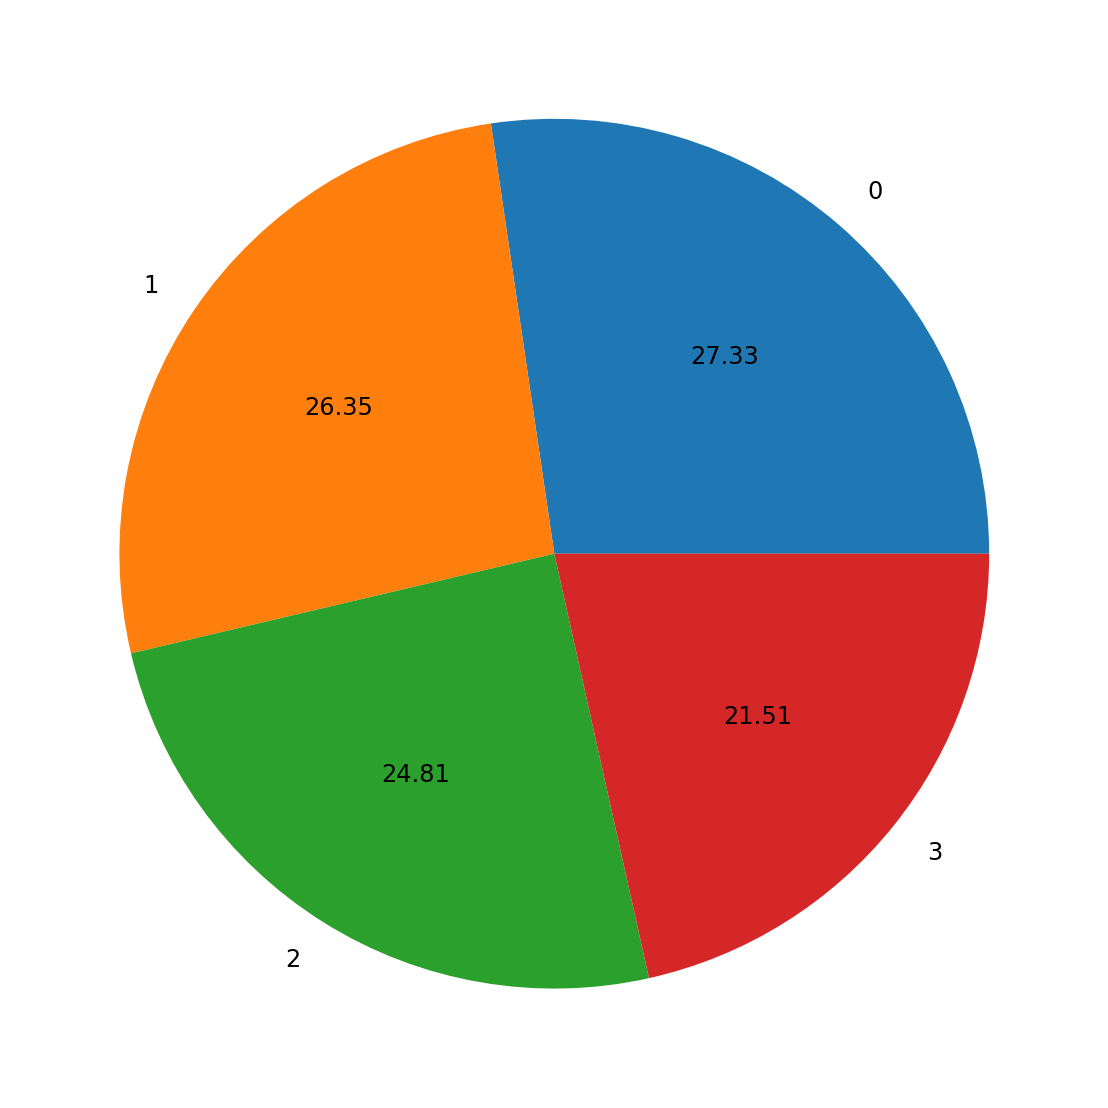

In [27]:
count_of_each_punch = np.array(y_train.value_counts())
punches = sorted(y_train.unique())

# Plot a pie chart for different punches
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_punch, labels = punches, autopct = '%0.2f')

<hr>
<center> <h1><font color="blue">Classification of the punches</font></h1> </center>
<h2>Use Linear SVC (with one-vs-the-rest), Standard SVC, Logistic Regression, KNN and Random Forest Classifier</h2>
<hr>

In [28]:
accuracy_scores = np.zeros(5)
clf_labels = ['Linear SVC (ovr)','Standard SVC', 'Logsitic Regression', 'KNN', 'Random Forest']

## Linear Support Vector Classifier

In [29]:
linSupp_Vectr_clf_punchtype = svm.LinearSVC()
linSupp_Vectr_clf_punchtype.fit(X_train, y_train) 
prediction = linSupp_Vectr_clf_punchtype.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Linear Vector Classifier accuracy (one-vs-rest): {}%'.format(accuracy_scores[0]))

Linear Vector Classifier accuracy (one-vs-rest): 88.51884312007012%


/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Standard support vector classifier

In [30]:
# Support Vector Classifier
stdSupp_Vectr_clf_punchtype = SVC().fit(X_train, y_train)
prediction = stdSupp_Vectr_clf_punchtype.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[1]))

/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 26.380368098159508%


## Logistic regression

In [31]:
# Logistic Regression
logistic_reggr_clf_punchtype = LogisticRegression().fit(X_train, y_train)
prediction = logistic_reggr_clf_punchtype.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[2]))

/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression accuracy: 92.90096406660824%


/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## K Nearest Neighbors

In [32]:
# K Nearest Neighbors
knn_clf_punchtype = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
prediction = knn_clf_punchtype.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[3]))

K Nearest Neighbors Classifier accuracy: 91.54250657318141%


## Random Forest

In [33]:
# Random Forest
rndm_forest_clf_punchtype = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
prediction = rndm_forest_clf_punchtype.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[4]))

Random Forest Classifier accuracy: 98.86064855390009%


## Overview of classifier prediction accuracy

Text(0.5, 1.0, 'Accuracy overview for label prediction')

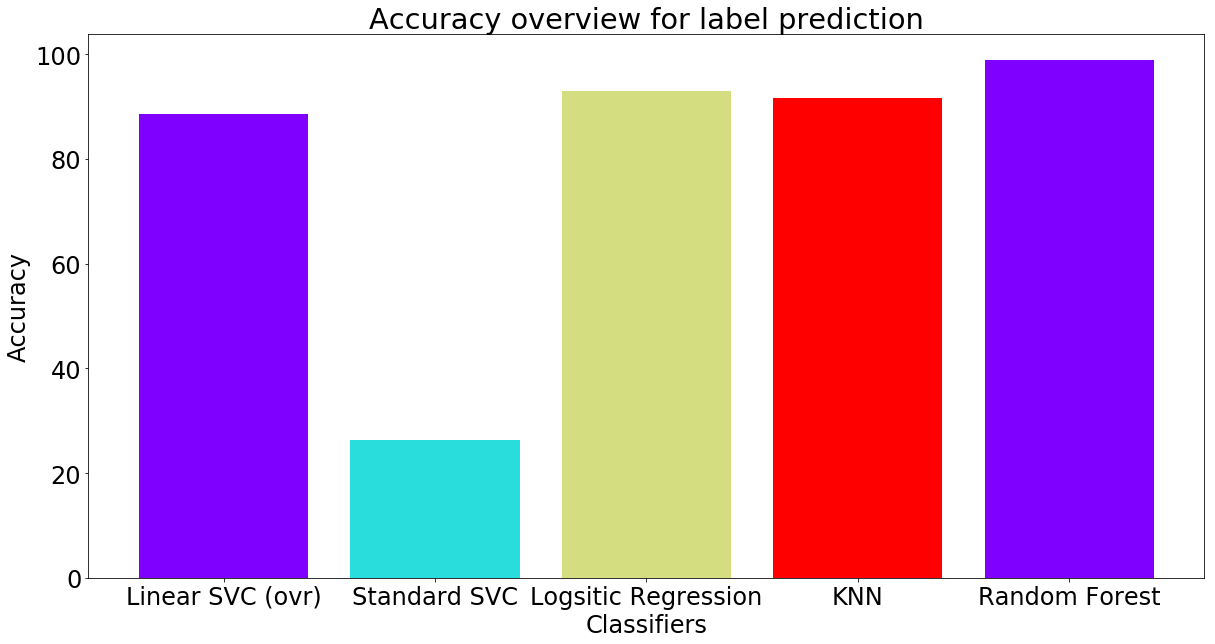

In [34]:
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(20,10))
plt.bar(clf_labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy overview for label prediction')

# Feature extraction for learning: hand

In [35]:
train_dataset = mixedPunches[0]
test_dataset = mixedPunches[1]

In [36]:
# try to use the minimal feature settings
settings_minimal = MinimalFCParameters() # only a few basic features
settings_minimal

{'sum_values': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'maximum': None,
 'minimum': None}

## extract the features for learning and training dataset

In [37]:
# extract features for test dataset
testds_for_extraction = test_dataset.drop(columns=['label','hand','annotator'])
test_dataset_extracted = extract_features(testds_for_extraction, column_id="punch_id",column_sort="timestamp", impute_function=impute, default_fc_parameters = settings_minimal);

Feature Extraction: 100%|██████████| 60/60 [00:01<00:00, 30.59it/s]


In [38]:
# extract features for train dataset
trainds_for_extraction = train_dataset.drop(columns=['label','hand','annotator'])
train_dataset_extracted = extract_features(trainds_for_extraction, column_id="punch_id",column_sort="timestamp", impute_function=impute, default_fc_parameters = settings_minimal);

Feature Extraction: 100%|██████████| 60/60 [00:05<00:00, 10.30it/s]


## create y_test and y_train dataset containing the hand information

In [39]:
test_dataset_unique_label_id = test_dataset.drop_duplicates(subset='punch_id', keep='first', inplace=False)
test_dataset_unique_label_id.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,6.793223,-2.383251,2.962314,0,1,0,0,0
2001,8.888567,-1.026224,3.812030,0,1,0,0,3
4002,-4.120440,3.302095,9.265009,0,3,0,1,5
6003,-5.704489,3.321238,7.558927,0,3,0,1,7
8004,7.188039,-1.718047,2.488536,0,1,0,0,8


In [40]:
y_test = pd.Series(data=test_dataset_unique_label_id['hand'])

In [41]:
train_dataset_unique_label_id = train_dataset.drop_duplicates(subset='punch_id', keep='first', inplace=False)
train_dataset_unique_label_id.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,8.322237,-1.923829,4.405187,0,1,0,0,1
2001,8.315059,-1.186840,3.000600,0,1,0,0,2
4002,-4.548756,3.505485,8.384451,0,3,0,1,4
6003,-4.900501,2.543571,9.310472,0,3,0,1,6
8004,-5.876772,3.393023,7.283752,0,3,0,1,10


In [42]:
y_train = pd.Series(data=train_dataset_unique_label_id['hand'])
y_train.head()

0       0
2001    0
4002    0
6003    0
8004    0
Name: hand, dtype: int64

## create the X_train and X_test dataset containing the features

In [43]:
X_train = train_dataset_extracted
X_test = test_dataset_extracted

## classify the hand of the subject

In [44]:
accuracy_scores_for_hand = np.zeros(5)
clf_for_hand = ['Linear SVC (ovr)','Standard SVC', 'Logsitic Regression', 'KNN', 'Random Forest']

## Linear Support Vector Classifier

In [45]:
linSupp_Vectr_clf_hand = svm.LinearSVC()
linSupp_Vectr_clf_hand.fit(X_train, y_train) 
prediction = linSupp_Vectr_clf_hand.predict(X_test)
accuracy_scores_for_hand[0] = accuracy_score(y_test, prediction)*100
print('Linear Vector Classifier accuracy (one-vs-rest): {}%'.format(accuracy_scores_for_hand[0]))

Linear Vector Classifier accuracy (one-vs-rest): 79.40403155127082%


/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Standard support vector classifier

In [46]:
# Support Vector Classifier
stdSupp_Vectr_clf_hand = SVC().fit(X_train, y_train)
prediction = stdSupp_Vectr_clf_hand.predict(X_test)
accuracy_scores_for_hand[1] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores_for_hand[1]))

/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 48.466257668711656%


## Logistic regression

In [47]:
# Logistic Regression
logistic_reggr_clf_hand = LogisticRegression().fit(X_train, y_train)
prediction = logistic_reggr_clf_hand.predict(X_test)
accuracy_scores_for_hand[2] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores_for_hand[2]))

Logistic Regression accuracy: 62.00701139351447%


/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## K Nearest Neighbors

In [48]:
# K Nearest Neighbors
knn_clf_hand = KNeighborsClassifier(n_neighbors=5)
knn_clf_hand.fit(X_train, y_train)
prediction = knn_clf_hand.predict(X_test)
accuracy_scores_for_hand[3] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores_for_hand[3]))

K Nearest Neighbors Classifier accuracy: 78.17703768624014%


## Random Forest

In [49]:
# Random Forest
rndm_forest_clf_hand = RandomForestClassifier(n_estimators = 100)
rndm_forest_clf_hand.fit(X_train, y_train)
prediction = rndm_forest_clf_hand.predict(X_test)
accuracy_scores_for_hand[4] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores_for_hand[4]))

Random Forest Classifier accuracy: 90.27169149868537%


## Prediction accuracy

Text(0.5, 1.0, 'Accuracy overview for hand-prediction')

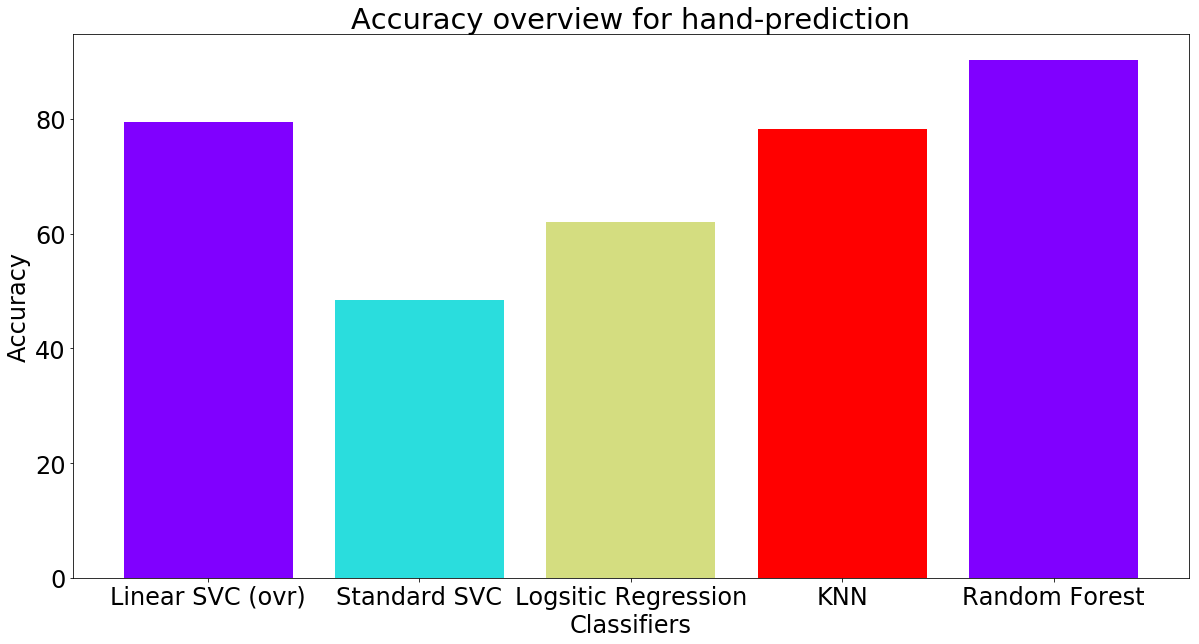

In [50]:
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(20,10))
plt.bar(clf_for_hand,
        accuracy_scores_for_hand,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy overview for hand-prediction')

# Feature extraction for learning: Annotator

In [51]:
train_dataset = mixedPunches[0]
test_dataset = mixedPunches[1]

In [52]:
# try to use the minimal feature settings
settings_minimal = MinimalFCParameters() # only a few basic features
settings_minimal

{'sum_values': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'maximum': None,
 'minimum': None}

## extract the features for learning and training dataset

In [53]:
# extract features for test dataset
testds_for_extraction = test_dataset.drop(columns=['label','hand','annotator'])
test_dataset_extracted = extract_features(testds_for_extraction, column_id="punch_id",column_sort="timestamp", impute_function=impute, default_fc_parameters = settings_minimal);

Feature Extraction: 100%|██████████| 60/60 [00:02<00:00, 24.02it/s]


In [54]:
# extract features for train dataset
trainds_for_extraction = train_dataset.drop(columns=['label','hand','annotator'])
train_dataset_extracted = extract_features(trainds_for_extraction, column_id="punch_id",column_sort="timestamp", impute_function=impute, default_fc_parameters = settings_minimal);

Feature Extraction: 100%|██████████| 60/60 [00:04<00:00, 12.18it/s]


## create y_test and y_train dataset containing the hand information

In [55]:
test_dataset_unique_label_id = test_dataset.drop_duplicates(subset='punch_id', keep='first', inplace=False)
test_dataset_unique_label_id.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,6.793223,-2.383251,2.962314,0,1,0,0,0
2001,8.888567,-1.026224,3.812030,0,1,0,0,3
4002,-4.120440,3.302095,9.265009,0,3,0,1,5
6003,-5.704489,3.321238,7.558927,0,3,0,1,7
8004,7.188039,-1.718047,2.488536,0,1,0,0,8


In [56]:
y_test = pd.Series(data=test_dataset_unique_label_id['annotator'])

In [57]:
train_dataset_unique_label_id = train_dataset.drop_duplicates(subset='punch_id', keep='first', inplace=False)
train_dataset_unique_label_id.head()

,a_x,a_y,a_z,timestamp,label,hand,annotator,punch_id
0,8.322237,-1.923829,4.405187,0,1,0,0,1
2001,8.315059,-1.186840,3.000600,0,1,0,0,2
4002,-4.548756,3.505485,8.384451,0,3,0,1,4
6003,-4.900501,2.543571,9.310472,0,3,0,1,6
8004,-5.876772,3.393023,7.283752,0,3,0,1,10


In [58]:
y_train = pd.Series(data=train_dataset_unique_label_id['annotator'])
y_train.head()

0       0
2001    0
4002    1
6003    1
8004    1
Name: annotator, dtype: int64

## create the X_train and X_test dataset containing the features

In [59]:
X_train = train_dataset_extracted
X_test = test_dataset_extracted

In [60]:
X_train.head()

variable,a_x__length,a_x__maximum,a_x__mean,a_x__median,a_x__minimum,a_x__standard_deviation,a_x__sum_values,a_x__variance,a_y__length,a_y__maximum,...,a_y__sum_values,a_y__variance,a_z__length,a_z__maximum,a_z__mean,a_z__median,a_z__minimum,a_z__standard_deviation,a_z__sum_values,a_z__variance
id,,,,,,,,,,,,,,,,,,,,,
1,2001.0,14.746404,4.050691,8.322237,-43.364920,12.149869,8105.433624,147.619326,2001.0,3.613881,...,-5387.067140,11.155707,2001.0,55.263834,6.767226,3.776467,-11.038901,13.505822,13541.219604,182.407221
2,2001.0,12.650668,3.306871,8.315059,-56.504578,13.429307,6617.049778,180.346280,2001.0,3.917139,...,-5154.169331,21.974058,2001.0,60.625234,6.734774,3.000600,-14.347197,14.913609,13476.281837,222.415742
4,2001.0,75.493534,-5.128794,-6.237128,-53.445345,14.539087,-10262.717539,211.385052,2001.0,47.990452,...,8500.836044,36.273087,2001.0,25.714775,4.408813,6.817141,-21.343998,6.244459,8822.035773,38.993270
6,2001.0,79.515979,-4.676748,-5.644009,-42.707557,15.684596,-9358.172630,246.006559,2001.0,73.175850,...,6866.525361,75.102740,2001.0,24.437570,3.911896,7.011459,-22.434421,7.650406,7827.704015,58.528709
10,2001.0,72.665326,-5.240635,-5.944409,-41.991215,15.216780,-10486.511566,231.550391,2001.0,36.972344,...,7777.984921,29.624853,2001.0,22.001653,4.730885,6.967802,-15.377833,5.834232,9466.501722,34.038258


## classify the subject

In [61]:
accuracy_scores_for_subject = np.zeros(5)
clf_for_subject = ['Linear SVC (ovr)','Standard SVC', 'Logsitic Regression', 'KNN', 'Random Forest']

## Linear Support Vector Classifier

In [62]:
linSupp_Vectr_clf_annotator = svm.LinearSVC().fit(X_train, y_train) 
prediction = linSupp_Vectr_clf_annotator.predict(X_test)
accuracy_scores_for_subject[0] = accuracy_score(y_test, prediction)*100
print('Linear Vector Classifier accuracy (one-vs-rest): {}%'.format(accuracy_scores_for_subject[0]))

Linear Vector Classifier accuracy (one-vs-rest): 26.33654688869413%


/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Standard support vector classifier

In [63]:
# Support Vector Classifier
stdSupp_Vectr_clf_annotator = SVC().fit(X_train, y_train)
prediction = stdSupp_Vectr_clf_annotator.predict(X_test)
accuracy_scores_for_subject[1] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores_for_subject[1]))

/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier accuracy: 12.489044697633654%


## Logistic regression

In [64]:
# Logistic Regression
logistic_reggr_clf_annotator = LogisticRegression().fit(X_train, y_train)
prediction = logistic_reggr_clf_annotator.predict(X_test)
accuracy_scores_for_subject[2] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores_for_subject[2]))

/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression accuracy: 52.62927256792288%


/home/twagner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## K Nearest Neighbors

In [65]:
# K Nearest Neighbors
knn_clf_annotator = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
prediction = knn_clf_annotator.predict(X_test)
accuracy_scores_for_subject[3] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores_for_subject[3]))

K Nearest Neighbors Classifier accuracy: 57.58106923751095%


## Random Forest

In [66]:
# Random Forest
rndm_forest_clf_annotator = RandomForestClassifier(n_estimators = 50).fit(X_train, y_train)
prediction = rndm_forest_clf_annotator.predict(X_test)
accuracy_scores_for_subject[4] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores_for_subject[4]))

Random Forest Classifier accuracy: 79.05346187554777%


## Prediction accuracy

Text(0.5, 1.0, 'Accuracy overview for annotator prediction')

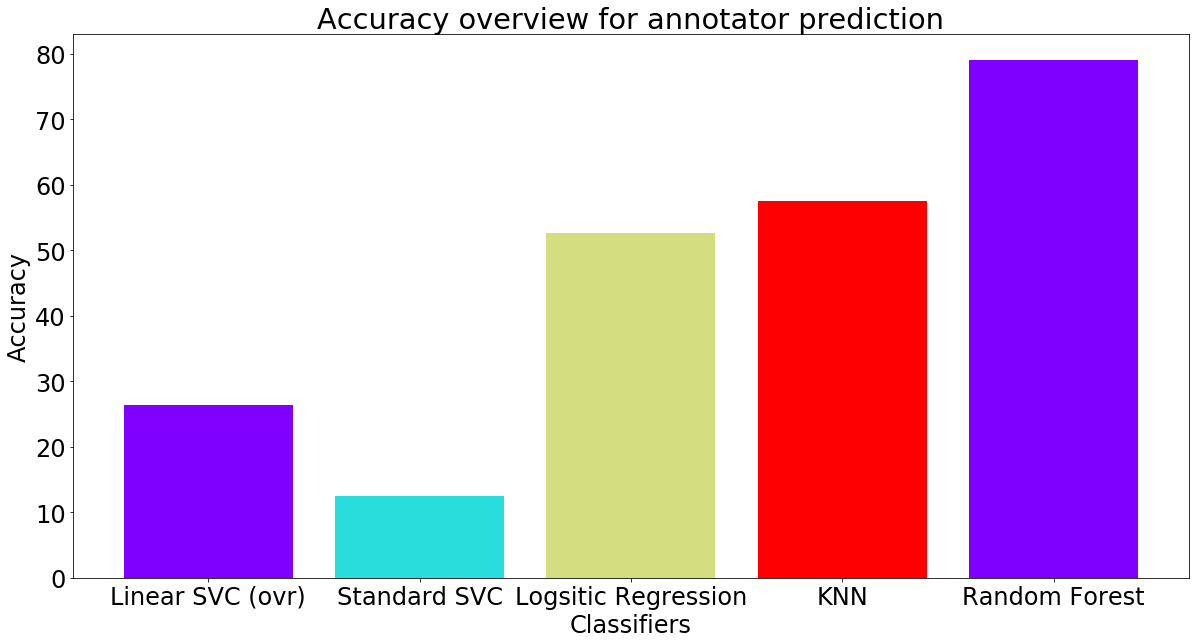

In [67]:
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(20,10))
plt.bar(clf_for_subject,
        accuracy_scores_for_subject,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy overview for annotator prediction')

<hr>
<center> <h1><font color="blue">Save the Models for reusing later</font></h1> </center>
<h2>Save the trained classification models for reuse in other scripts.</h2>
<hr>

In [68]:
import pickle

## Store the models for the punch classification

### Linear SVC

In [122]:
pkl_filename = "model_linSupp_Vectr_clf_punchtype_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(linSupp_Vectr_clf_punchtype, file)

### Standard SVC

In [123]:
pkl_filename = "model_stdSupp_Vectr_clf_punchtype_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(stdSupp_Vectr_clf_punchtype, file)

### Logistic Regression

In [124]:
pkl_filename = "model_logistic_reggr_clf_punchtype_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(logistic_reggr_clf_punchtype, file)

### KNN

In [125]:
pkl_filename = "model_knn_clf_punchtype_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(knn_clf_punchtype, file)

### Random Forest

In [126]:
pkl_filename = "model_rndm_forest_clf_punchtype_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(rndm_forest_clf_punchtype, file)

## Store the models for the hand classification

### Linear SVC

In [127]:
pkl_filename = "model_linSupp_Vectr_clf_hand_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(linSupp_Vectr_clf_hand, file)

### Standard SVC

In [128]:
pkl_filename = "model_stdSupp_Vectr_clf_hand_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(stdSupp_Vectr_clf_hand, file)

### Logistic Regression

In [129]:
pkl_filename = "model_logistic_reggr_clf_hand_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(logistic_reggr_clf_hand, file)

### KNN

In [130]:
pkl_filename = "model_knn_clf_hand_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(knn_clf_hand, file)

### Random Forest

In [131]:
pkl_filename = "model_rndm_forest_clf_hand_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(rndm_forest_clf_hand, file)

## Store the models for the annotator classification

### Linear SVC

In [132]:
pkl_filename = "model_linSupp_Vectr_clf_annotator_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(linSupp_Vectr_clf_annotator, file)

### Standard SVC

In [133]:
pkl_filename = "model_stdSupp_Vectr_clf_annotator_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(stdSupp_Vectr_clf_annotator, file)

### Logistic Regression

In [134]:
pkl_filename = "model_logistic_reggr_clf_annotator_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(logistic_reggr_clf_annotator, file)

### KNN

In [135]:
pkl_filename = "model_knn_clf_annotator_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(knn_clf_annotator, file)

### Random Forest

In [136]:
pkl_filename = "model_rndm_forest_clf_annotator_periodMS2000_sampleUS1000_TrainSize70.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(rndm_forest_clf_annotator, file)